In [251]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import plotly.express as px

plt.style.use("seaborn-v0_8")

In [252]:
df_clusters = pd.read_excel("df_clusters.xlsx")

In [253]:
# Mapeo clusters

def mapeo_clusters(valor):
    if valor == 2:
        return 1
    elif valor == 0:
        return 2
    elif valor == 3:
        return 3
    elif valor == 1:
        return 4
    else:
        return 5
    
df_clusters["Cluster kmeans"] = df_clusters["Cluster kmeans"].apply(mapeo_clusters)

In [254]:
# Visualización 1: Preparación de datos

alava = df_clusters[df_clusters["Provincia_Alava"]==True]
gipuzkoa = df_clusters[df_clusters["Provincia_Guipuzcoa"]==True]
bizkaia = df_clusters[df_clusters["Provincia_Guipuzcoa"]==False]
bizkaia = bizkaia[df_clusters["Provincia_Alava"]==False]

alava_count = alava.value_counts("Cluster kmeans").sort_index()
gipuzkoa_count = gipuzkoa.value_counts("Cluster kmeans").sort_index()
bizkaia_count = bizkaia.value_counts("Cluster kmeans").sort_index()

C:\Users\benat\AppData\Local\Temp\ipykernel_2020\3038026143.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 1.0, 'Total de empresas por cluster')

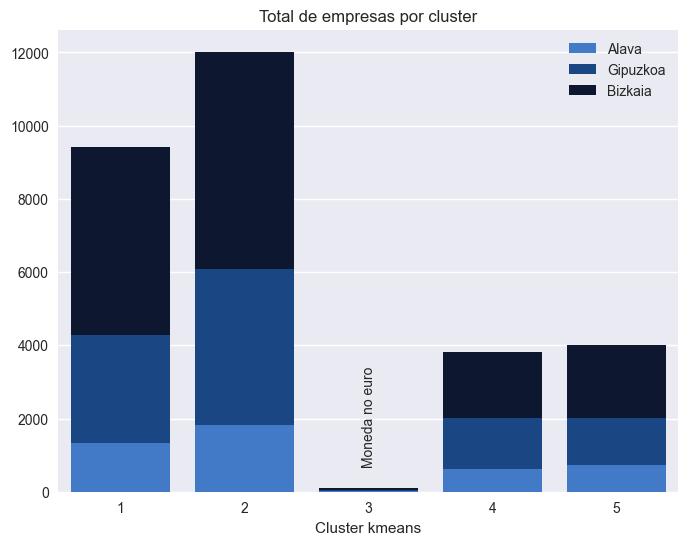

In [255]:
# Visualización 1

fig1, ax1, = plt.subplots(figsize=(8,6))

ax1 = sns.barplot(x=alava_count.index,y=alava_count.values,color="#2c76de",label="Alava")
ax1 = sns.barplot(x=gipuzkoa_count.index,y=gipuzkoa_count.values,bottom=alava_count.values,color="#084396",label="Gipuzkoa")
ax1 = sns.barplot(x=bizkaia_count.index,y=bizkaia_count.values,bottom=(alava_count.values+gipuzkoa_count.values),color="#071436",label="Bizkaia")

ax1.annotate("Moneda no euro",xy=(1.95,750),rotation=90)

ax1.set_title("Total de empresas por cluster")

In [256]:
# Visualización 2

fig7 = px.box(df_clusters[df_clusters["Cluster kmeans"]!=5],x="Cluster kmeans", y = 'Total activo\nmil EUR\n2022',
              color="Cluster kmeans",
              color_discrete_map={1: "#071436",2:"#084396",3:"#2c76de",4:"#84b1f0"},
              title="Total Activo por cluster")

fig7.update_layout(showlegend=False,
                   width=700,
                   height=500)

fig7.show()

In [257]:
# Visualizacion 3: Preparación de datos

clusters_agrupado = df_clusters.drop(columns=["Unnamed: 0","Código NIF"]).groupby("Cluster kmeans").mean()

cluster_1 = clusters_agrupado[["Endeudamiento","Solvencia","Evolucion_ventas","ROA"]].loc[1]
cluster_2 = clusters_agrupado[["Endeudamiento","Solvencia","Evolucion_ventas","ROA"]].loc[2]
cluster_3 = clusters_agrupado[["Endeudamiento","Solvencia","Evolucion_ventas","ROA"]].loc[3]
cluster_4 = clusters_agrupado[["Endeudamiento","Solvencia","Evolucion_ventas","ROA"]].loc[4]
cluster_5 = clusters_agrupado[["Endeudamiento","Solvencia","Evolucion_ventas","ROA"]].loc[5]

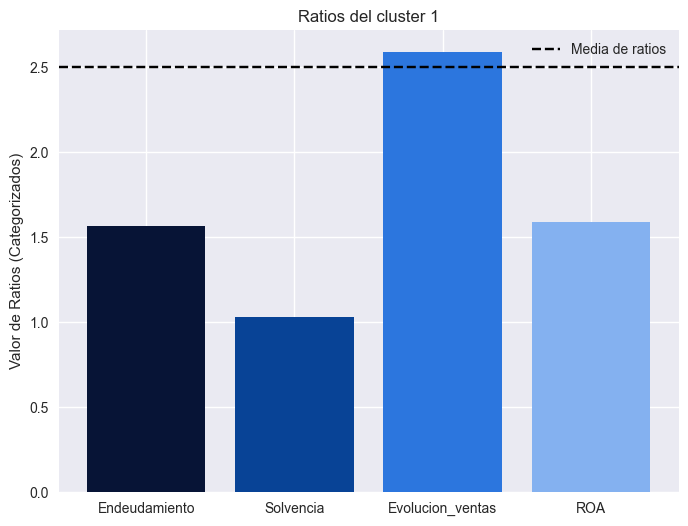

In [258]:
# Visualizacion 3.1

fig2, ax2 = plt.subplots(figsize=(8,6))

ax2.bar(cluster_1.index,cluster_1.values,color=["#071436","#084396","#2c76de","#84b1f0"])
ax2.set_title("Ratios del cluster 1")
ax2.axhline(2.5,linestyle="--",label="Media de ratios",color ="black")

ax2.set_ylabel("Valor de Ratios (Categorizados)")

ax2.legend()

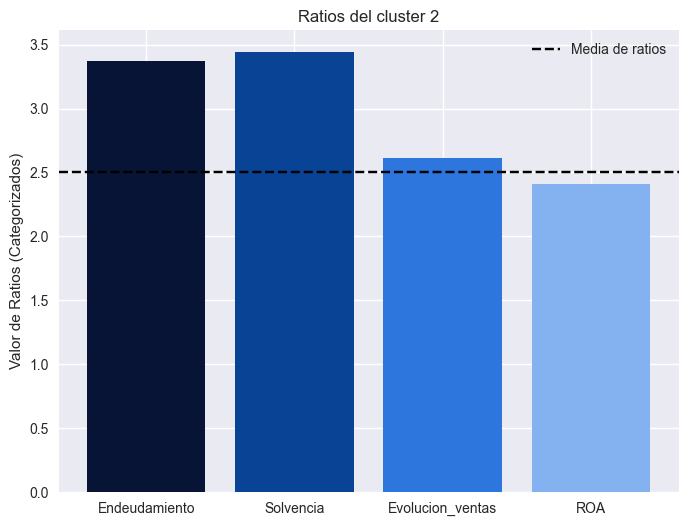

In [259]:
# Visualizacion 3.2

fig3, ax3 = plt.subplots(figsize=(8,6))

ax3.bar(cluster_2.index,cluster_2.values,color=["#071436","#084396","#2c76de","#84b1f0"])
ax3.set_title("Ratios del cluster 2")
ax3.axhline(2.5,linestyle="--",label="Media de ratios",color ="black")

ax3.set_ylabel("Valor de Ratios (Categorizados)")

ax3.legend()

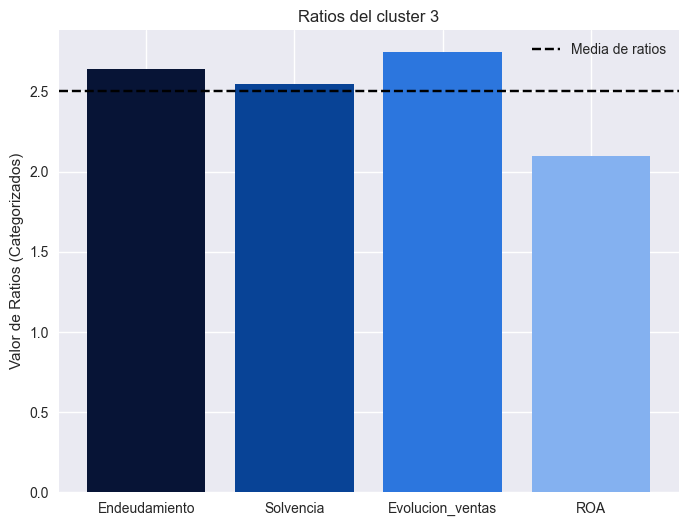

In [260]:
# Visualizacion 3.3

fig4, ax4 = plt.subplots(figsize=(8,6))

ax4.bar(cluster_3.index,cluster_3.values,color=["#071436","#084396","#2c76de","#84b1f0"])
ax4.set_title("Ratios del cluster 3")
ax4.axhline(2.5,linestyle="--",label="Media de ratios",color ="black")

ax4.set_ylabel("Valor de Ratios (Categorizados)")

ax4.legend()

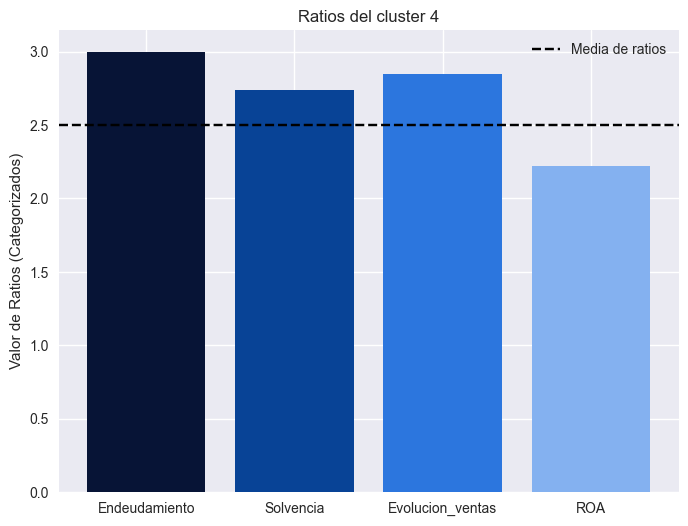

In [261]:
# Visualizacion 3.4

fig5, ax5 = plt.subplots(figsize=(8,6))

ax5.bar(cluster_4.index,cluster_4.values,color=["#071436","#084396","#2c76de","#84b1f0"])
ax5.set_title("Ratios del cluster 4")
ax5.axhline(2.5,linestyle="--",label="Media de ratios",color ="black")

ax5.set_ylabel("Valor de Ratios (Categorizados)")

ax5.legend()

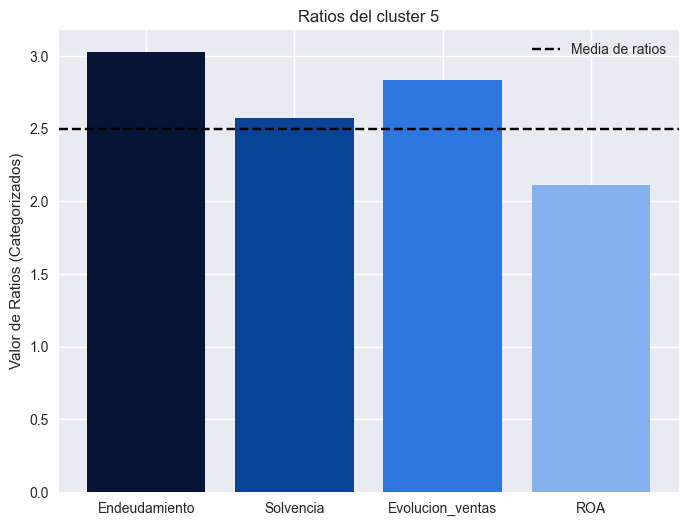

In [262]:
# Visualizacion 3.5

fig6, ax6 = plt.subplots(figsize=(8,6))

ax6.bar(cluster_5.index,cluster_5.values,color=["#071436","#084396","#2c76de","#84b1f0"])
ax6.set_title("Ratios del cluster 5")
ax6.axhline(2.5,linestyle="--",label="Media de ratios",color ="black")

ax6.set_ylabel("Valor de Ratios (Categorizados)")

ax6.legend()